In [1]:
import os
import yaml
import random
from IPython.display import display, HTML, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import moran_simulator as ms

mario_blue = "#6485fb"
mario_red = "#d20709"
mario_purple = "#9b4682"
mario_brown = "#974a02"
mario_gold = "#f7bc31"
mario_dark_green = "#148817"
mario_light_green = "#6df930"

AUTHOR: Maciej_Bak  
AFFILIATION: University_of_Basel  
AFFILIATION: Swiss_Institute_of_Bioinformatics  
CONTACT: wsciekly.maciek@gmail.com  
CREATED: 25-07-2020  
LICENSE: MIT

# <center>Moran Simulator: usecase tests</center>

Population evolve according to the Moran Process with fitness-based selection: https://en.wikipedia.org/wiki/Moran_process

## Test 1: Stag Hunt
https://en.wikipedia.org/wiki/Stag_hunt

Birth Payoff Matrix:
$
B = \begin{pmatrix}
4 & 1\\
3 & 2
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1\\
1 & 1
\end{pmatrix}
$ (random selection)

In [2]:
# initiate Moran Process

size_list = [700, 300]
label_list = ["stag", "hare"]

BirthPayoffMatrix = np.array([[4, 1], [3, 2]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [3]:
# simulate evolution
random.seed(0)
simulation1 = mp.simulate(generations=10000)

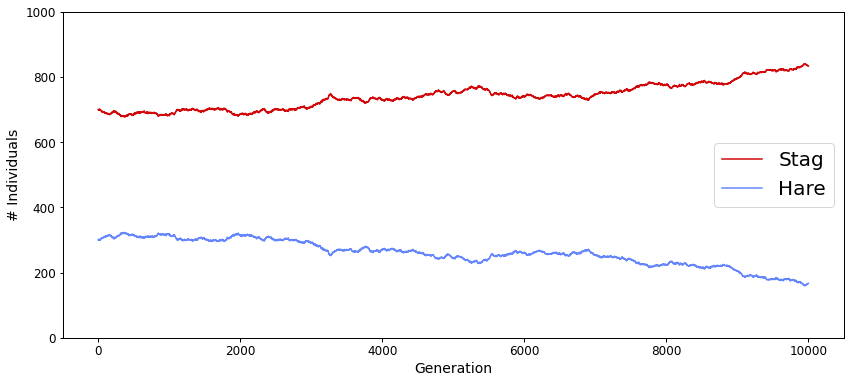

In [4]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation1['stag__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Stag")
simulation1['hare__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Hare")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

## Test 2: Chicken
https://en.wikipedia.org/wiki/Chicken_(game)

Birth Payoff Matrix:
$
B = \begin{pmatrix}
0 & -1\\
1 & -100
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1\\
1 & 1
\end{pmatrix}
$ (random selection)

In [5]:
# initiate Moran Process

size_list = [10, 990]
label_list = ["swerve", "straight"]

BirthPayoffMatrix = np.array([[0, -1], [1, -100]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [6]:
# simulate evolution
random.seed(0)
simulation2 = mp.simulate(generations=10000)

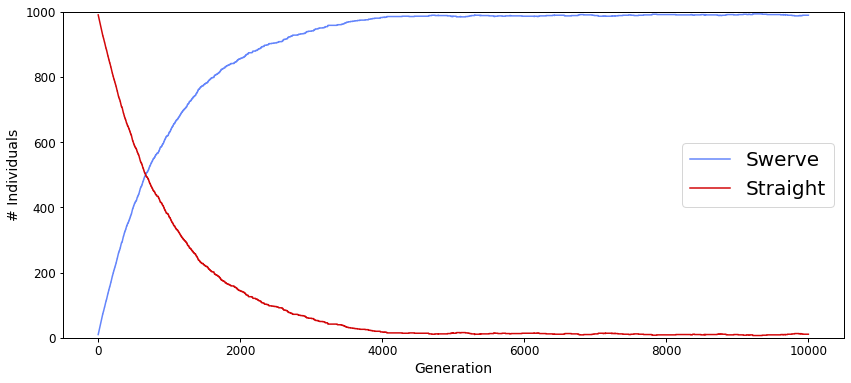

In [7]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation2['swerve__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Swerve")
simulation2['straight__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Straight")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

## Test 3: Prisoners Dilemma
https://en.wikipedia.org/wiki/Prisoner%27s_dilemma

Birth Payoff Matrix:
$
B = \begin{pmatrix}
3 & 0\\
5 & 1
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1\\
1 & 1
\end{pmatrix}
$ (random selection)

In [8]:
# initiate Moran Process

size_list = [990, 10]
label_list = ["cooperate", "defect"]

BirthPayoffMatrix = np.array([[3, 0], [5, 1]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [9]:
# simulate evolution
random.seed(0)
simulation3 = mp.simulate(generations=25000)

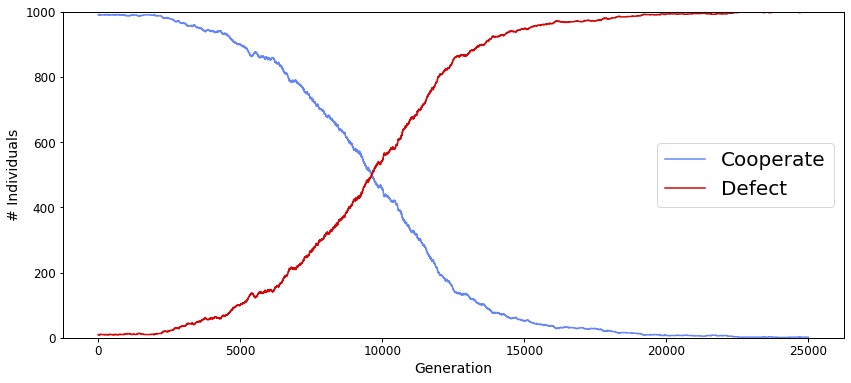

In [10]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation3['cooperate__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Cooperate")
simulation3['defect__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Defect")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

## Test 4: Rock-Paper-Scissors
https://en.wikipedia.org/wiki/Rock_paper_scissors

Birth Payoff Matrix:
$
B = \begin{pmatrix}
0 & -10 & 10\\
10 & 0 & -10\\
-10 & 10 & 0
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}
$ (random selection)

In [11]:
# initiate Moran Process

size_list = [333, 333, 333]
label_list = ["rock", "paper", "scissors"]

BirthPayoffMatrix = np.array([[0, -10, 10], [10, 0, -10], [-10, 10, 0]])
DeathPayoffMatrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [12]:
# simulate evolution
random.seed(1)
simulation4 = mp.simulate(generations=5000)

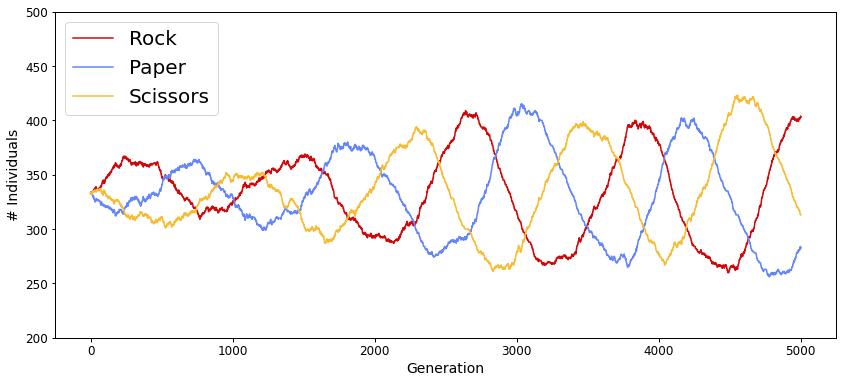

In [13]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation4['rock__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Rock")
simulation4['paper__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Paper")
simulation4['scissors__size'].plot(color=mario_gold, linewidth=1.5, ax=ax, label="Scissors")
ax.set_ylim([200,500])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=2, fontsize=20)
plt.show()

## Publication Figure

Prepare a figure with all the simulations altogether:

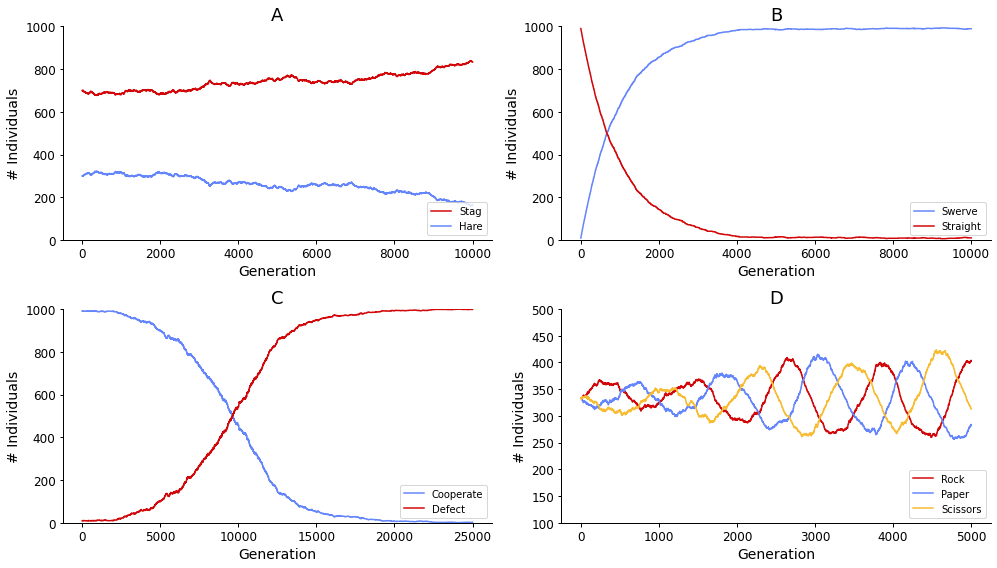

In [14]:
fig, ax =  plt.subplots(2, 2, figsize=(14,8))

plt.subplot(2, 2, 1)
ax1 = plt.gca()
ax1.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1)
simulation1['stag__size'].plot(color=mario_red, linewidth=1.5, ax=ax1, label="Stag")
simulation1['hare__size'].plot(color=mario_blue, linewidth=1.5, ax=ax1, label="Hare")
ax1.set_ylim([0,1000])
plt.title("A", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(loc=4, fontsize=10)

plt.subplot(2, 2, 2)
ax2 = plt.gca()
ax2.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
simulation2['swerve__size'].plot(color=mario_blue, linewidth=1.5, ax=ax2, label="Swerve")
simulation2['straight__size'].plot(color=mario_red, linewidth=1.5, ax=ax2, label="Straight")
ax2.set_ylim([0,1000])
plt.title("B", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(loc=4, fontsize=10)

plt.subplot(2, 2, 3)
ax3 = plt.gca()
ax3.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(1)
simulation3['cooperate__size'].plot(color=mario_blue, linewidth=1.5, ax=ax3, label="Cooperate")
simulation3['defect__size'].plot(color=mario_red, linewidth=1.5, ax=ax3, label="Defect")
ax3.set_ylim([0,1000])
plt.title("C", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.legend(loc=4, fontsize=10)

plt.subplot(2, 2, 4)
ax4 = plt.gca()
ax4.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(1)
simulation4['rock__size'].plot(color=mario_red, linewidth=1.5, ax=ax4, label="Rock")
simulation4['paper__size'].plot(color=mario_blue, linewidth=1.5, ax=ax4, label="Paper")
simulation4['scissors__size'].plot(color=mario_gold, linewidth=1.5, ax=ax4, label="Scissors")
ax4.set_ylim([100,500])
plt.title("D", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.legend(loc=4, fontsize=10)

sns.despine(ax=ax1)
sns.despine(ax=ax2)
sns.despine(ax=ax3)
sns.despine(ax=ax4)

plt.tight_layout()
plt.savefig(os.path.join("..", "images", "figure.png"), dpi=300)
plt.show()

---